In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
landMarks = pd.read_csv('../../processing/landmarking/mit/mitLandmarks.csv',index_col = 0)
images = list(set(landMarks.index.tolist()))
images.sort()
X_LMmatrix = np.zeros((len(images),68))
Y_LMmatrix = np.zeros((len(images),68))

# x = landMarks.ix[images[0]].x.tolist()
# print x
imList = images
for im in images:
    ind_im = images.index(im)
    imList[ind_im] = im[3:]
    X_LMmatrix[ind_im,:] = landMarks.ix[im].x.tolist()
    Y_LMmatrix[ind_im,:] = landMarks.ix[im].y.tolist()

In [374]:
from PIL import Image
import colorsys
# print Rectangle((someX, someY), yLength, yLength*0.5)
def get3RegionRect(X_LMmatrix,Y_LMmatrix, imInd):
    yLengthArr = []
    xLengthArr = []
    someX_Arr = []
    someY_Arr = []
    #left patch
    yLengthArr.append(Y_LMmatrix[imInd,4]-Y_LMmatrix[imInd,3])
    xLengthArr.append((X_LMmatrix[imInd,48]-X_LMmatrix[imInd,2])/2)
    someX_Arr.append((X_LMmatrix[imInd,48]+X_LMmatrix[imInd,3])/2-xLength[0]/2) 
    someY_Arr.append((Y_LMmatrix[imInd,2]+Y_LMmatrix[imInd,29])/2-yLength[0]/2)
    #right patch
    yLengthArr.append(Y_LMmatrix[imInd,12]-Y_LMmatrix[imInd,13])
    xLengthArr.append((X_LMmatrix[imInd,12]-X_LMmatrix[imInd,54])/2)
    someX_Arr.append((X_LMmatrix[imInd,54]+X_LMmatrix[imInd,13])/2-xLength[1]/2) 
    someY_Arr.append((Y_LMmatrix[imInd,29]+Y_LMmatrix[imInd,14])/2-yLength[1]/2)
    #top patch
    yLengthArr.append((X_LMmatrix[imInd,22]-X_LMmatrix[imInd,21])/2)
    xLengthArr.append(X_LMmatrix[imInd,22]-X_LMmatrix[imInd,21])
    someX_Arr.append((X_LMmatrix[imInd,21]+X_LMmatrix[imInd,22])/2-xLength[2]/2) 
    someY_Arr.append((Y_LMmatrix[imInd,21]+Y_LMmatrix[imInd,22])/2-yLength[2]/2)
    return someX_Arr, someY_Arr, xLengthArr, yLengthArr

def findAllCoors(someX, someY, xLength, yLength):
    Xmatrix = np.zeros((int(xLength),int(yLength)))
    Ymatrix = np.zeros((int(xLength),int(yLength)))
    for i in range(int(xLength)):
        for j in range(int(yLength)):
            Xmatrix[i,j] = int(someX)+i
            Ymatrix[i,j] = int(someY)+j
    return Xmatrix,Ymatrix

def getAveColor (someX, someY, xLength, yLength, imageName):
    im = Image.open(imageName)
    rgb_im = im.convert('RGB')
    Xmatrix,Ymatrix = findAllCoors(someX, someY, xLength, yLength) 
    Xsize, Ysize = Xmatrix.shape
    hValue = np.zeros((Xsize, Ysize))
    sValue = np.zeros((Xsize, Ysize))
    vValue = np.zeros((Xsize, Ysize))
    for i in range(Xsize):
        for j in range (Ysize):
            r, g, b = rgb_im.getpixel((Xmatrix[i,j],Ymatrix[i,j]))
            hValue[i,j],sValue[i,j],vValue[i,j] = colorsys.rgb_to_hsv(r, g, b)
    return [hValue.mean(),sValue.mean(),vValue.mean()]

rand_int = imList.index(random.choice(imList))
getAveColor(someX_Arr[1], someY_Arr[1], xLengthArr[1], yLengthArr[1], imList[imInd])
meanHSV = np.zeros((len(imList), 3))
for imInd in range(len(imList)):
    someX_Arr, someY_Arr, xLengthArr, yLengthArr = get3RegionRect(X_LMmatrix,Y_LMmatrix, imInd)
    tempMean = np.zeros((1,3))
    for j in range(len(someX_Arr)):
        tempMean += np.asarray(getAveColor(someX_Arr[j], someY_Arr[j], xLengthArr[j], yLengthArr[j], imList[imInd]))
    meanHSV[imInd,:] = tempMean/3

In [391]:
print 'H mean: ', meanHSV[:,0].mean(),', S mean: ', meanHSV[:,1].mean(), ', V mean: ', meanHSV[:,2].mean()
print 'H std: ', meanHSV[:,0].std(),', S std: ', meanHSV[:,1].std(),', V std: ', meanHSV[:,2].std()

H mean:  0.203649133606 , S mean:  0.000281611629798 , V mean:  193.713509483
H std:  0.115987456815 , S std:  0.00409227904198 , V std:  29.5232594432


In [392]:
from skimage import feature
# Compute the Canny filter for two values of sigma
def getSmoothness(imageName, someX_Arr, someY_Arr, xLengthArr, yLengthArr, ifPlot = False,sigma=1):
    BigImage = color.rgb2gray(io.imread(imageName))
    edged = feature.canny(BigImage, sigma = sigma)
    #print BigImage.shape
    if ifPlot:
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(6, 3), sharex=True, sharey=True)

        ax1.imshow(BigImage, cmap=plt.cm.gray)
        ax1.axis('off')
        ax1.set_title('original image', fontsize=20)

        ax2.imshow(edged, cmap=plt.cm.gray)
        ax2.axis('off')
        ax2.set_title('Canny filter, $\sigma='+str(sigma)+'$', fontsize=20)

        fig.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9,
                            bottom=0.02, left=0.02, right=0.98)
        plt.show()
    aveEdgeNum = 0.0
    for j in range(len(someX_Arr)):
        image = img[int(someY_Arr[j]):int(someY_Arr[j]+yLengthArr[j])\
                  ,int(someX_Arr[j]):int(someX_Arr[j]+xLengthArr[j])]
        edged = feature.canny(image, sigma = sigma)
        if ifPlot:
            fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(6, 3), sharex=True, sharey=True)

            ax1.imshow(image, cmap=plt.cm.gray)
            ax1.axis('off')
            ax1.set_title('original image', fontsize=20)

            ax2.imshow(edged, cmap=plt.cm.gray)
            ax2.axis('off')
            ax2.set_title('Canny filter, $\sigma='+str(sigma)+'$', fontsize=20)

            fig.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9,
                                bottom=0.02, left=0.02, right=0.98)
            plt.show()
        aveEdgeNum += edged.sum()
        #print image.shape
    aveEdgeNum /=float(len(someX_Arr))
    return aveEdgeNum
smoothness = np.zeros((len(imList),1))
custom_sigma = 0.33
ifPlot = False
for imInd in range(len(imList)):
    someX_Arr, someY_Arr, xLengthArr, yLengthArr = get3RegionRect(X_LMmatrix,Y_LMmatrix, imInd)
    #print someX_Arr, someY_Arr, xLengthArr, yLengthArr
    smoothness[imInd] = \
    getSmoothness(imList[imInd], someX_Arr, someY_Arr, xLengthArr, yLengthArr,sigma=custom_sigma,ifPlot = ifPlot)

print 'smoothness mean: ',smoothness.mean(),', smoothness std: ', smoothness.std()

smoothness mean:  56.5944721341 , smoothness std:  17.9722840552


In [440]:
# save as a csv
from pandas import DataFrame
data = np.concatenate((meanHSV,smoothness), axis=1)
geometric = pd.read_csv('../../MIT2kFaceDataset/clean_data/geometric_all.csv',index_col = 0)
df = DataFrame(data,columns=['h', 's', 'v', 'smoothness'])
df = pd.concat([geometric,df], axis=1)
df.to_csv('../../MIT2kFaceDataset/clean_data/geometric_wSmoothness.csv',index = False)
df = pd.read_csv('../../MIT2kFaceDataset/clean_data/geometric_wSmoothness.csv',index_col = 0)


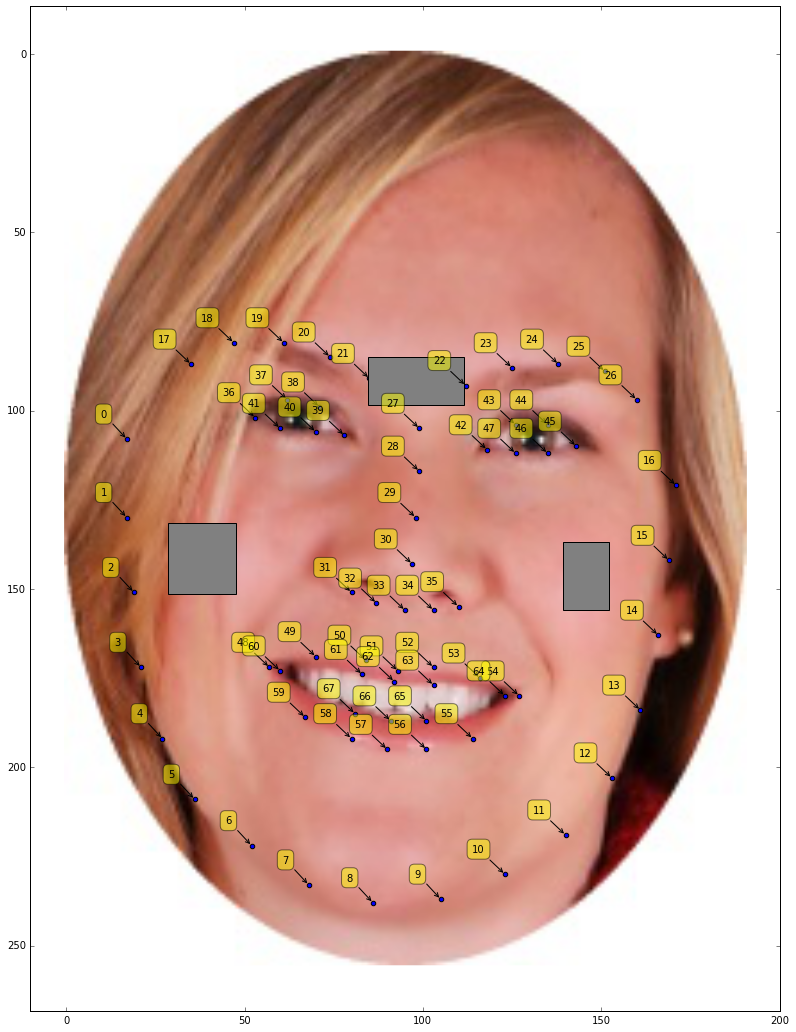

[28.5, 139.25, 84.5] [131.5, 137.0, 85.0] [19.0, 13.0, 27.0] [20.0, 19.0, 13.5]
19.0 151.0


In [411]:
from matplotlib.patches import Rectangle
import random
imInd = imList.index(random.choice(imList))
im = plt.imread(imList[imInd])
fSize = 6
implot = plt.imshow(im)
import pylab
# put a blue dot at (10, 20)
plt.scatter(X_LMmatrix[imInd,:],Y_LMmatrix[imInd,:])
labels = [str(i) for i in range(68)]
for label, x, y in zip(labels, X_LMmatrix[imInd,:], Y_LMmatrix[imInd,:]):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
yLengthArr = []
xLengthArr = []
someX_Arr = []
someY_Arr = []
# left patch
yLengthArr.append(Y_LMmatrix[imInd,4]-Y_LMmatrix[imInd,3])
xLengthArr.append((X_LMmatrix[imInd,48]-X_LMmatrix[imInd,2])/2)
someX_Arr.append((X_LMmatrix[imInd,48]+X_LMmatrix[imInd,3])/2-xLength[0]/2) 
someY_Arr.append((Y_LMmatrix[imInd,2]+Y_LMmatrix[imInd,29])/2-yLength[0]/2)
# right patch
yLengthArr.append(Y_LMmatrix[imInd,12]-Y_LMmatrix[imInd,13])
xLengthArr.append((X_LMmatrix[imInd,12]-X_LMmatrix[imInd,54])/2)
someX_Arr.append((X_LMmatrix[imInd,54]+X_LMmatrix[imInd,13])/2-xLength[1]/2) 
someY_Arr.append((Y_LMmatrix[imInd,29]+Y_LMmatrix[imInd,14])/2-yLength[1]/2)
# top patch
yLengthArr.append((X_LMmatrix[imInd,22]-X_LMmatrix[imInd,21])/2)
xLengthArr.append(X_LMmatrix[imInd,22]-X_LMmatrix[imInd,21])
someX_Arr.append((X_LMmatrix[imInd,21]+X_LMmatrix[imInd,22])/2-xLength[2]/2) 
someY_Arr.append((Y_LMmatrix[imInd,21]+Y_LMmatrix[imInd,22])/2-yLength[2]/2)
currentAxis = plt.gca()
for i in range(len(xLength)):
    currentAxis.add_patch(Rectangle((someX_Arr[i], someY_Arr[i]), xLengthArr[i], yLengthArr[i], facecolor="grey"))
    
fig = pylab.gcf()
fig.set_size_inches(5*fSize, 3*fSize)
plt.show()
print someX_Arr, someY_Arr, xLengthArr, yLengthArr
print X_LMmatrix[imInd,2], Y_LMmatrix[imInd,2]

In [360]:
from PIL import Image
im_Image = Image.open(imList[imInd])
rgb_im = im_Image.convert('RGB')
r, g, b = rgb_im.getpixel((X_LMmatrix[imInd,1],Y_LMmatrix[imInd,1]))
print r,g,b
import colorsys
h,s,v = colorsys.rgb_to_hsv(r, g, b)
print h,s,v

print im[int(Y_LMmatrix[imInd,1]),int(X_LMmatrix[imInd,1]),:]

18 14 11
0.166666666667 0 18
[18 14 11]


4969
9736


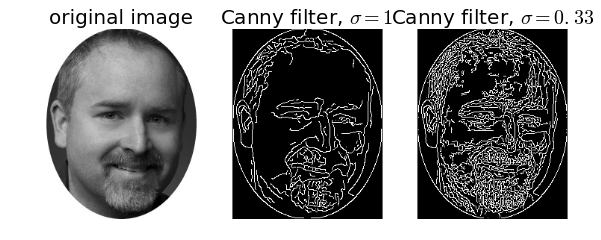

In [377]:

img = color.rgb2gray(io.imread(imList[imInd]))
smallRegion = img[int(someX_Arr[1]):int(someX_Arr[1]+xLengthArr[1])\
                  ,int(someY_Arr[1]):int(someY_Arr[1]+yLengthArr[1])]
#im = smallRegion
im = img
custom_sigma = 0.33
#edges3 = auto_canny(im, sigma = 0.9)
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma = custom_sigma)
print edges1.sum()
print edges2.sum()
#print edges3.sum()
# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3), sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('original image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma='+str(custom_sigma)+'$', fontsize=20)

# ax4.imshow(edges3, cmap=plt.cm.gray)
# ax4.axis('off')
# ax4.set_title('auto', fontsize=20)

fig.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9,
                    bottom=0.02, left=0.02, right=0.98)

plt.show()

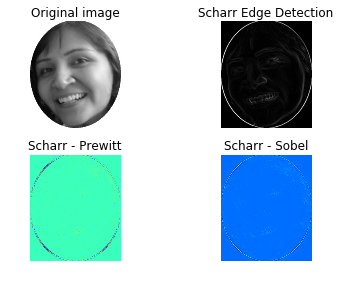

In [286]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.filters import roberts, sobel, scharr, prewitt
from skimage import color
from skimage import io

img = color.rgb2gray(io.imread(imList[imInd]));

edge_sobel = sobel(img)
edge_scharr = scharr(img)
edge_prewitt = prewitt(img)

diff_scharr_prewitt = edge_scharr - edge_prewitt
diff_scharr_sobel = edge_scharr - edge_sobel
max_diff = np.max(np.maximum(diff_scharr_prewitt, diff_scharr_sobel))

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, subplot_kw={'adjustable':'box-forced'})

ax0.imshow(img, cmap=plt.cm.gray)
ax0.set_title('Original image')
ax0.axis('off')

ax1.imshow(edge_scharr, cmap=plt.cm.gray)
ax1.set_title('Scharr Edge Detection')
ax1.axis('off')

ax2.imshow(diff_scharr_prewitt, cmap=plt.cm.jet, vmax=max_diff)
ax2.set_title('Scharr - Prewitt')
ax2.axis('off')

ax3.imshow(diff_scharr_sobel, cmap=plt.cm.jet, vmax=max_diff)
ax3.set_title('Scharr - Sobel')
ax3.axis('off')

plt.tight_layout()
plt.show()

